<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW9/HW9_JHicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import numpy as np
import pandas as pd
import sys
import os
import glob as glob

import scipy.io.wavfile as wav
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

import pylab as pl
%pylab inline
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras import optimizers
from keras import Model
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
Starting_Dataset = numpy.load('drive/MyDrive/MLTSA22/PLAsTiCC_autoencoder_data.npy', allow_pickle= True)

In [16]:
data_mat = np.reshape(Starting_Dataset, (-1, 600))

In [17]:
pass_list = []
for i in range(0,6):
  pass_mat = data_mat[i::6,:]
  pass_list.append(pass_mat)
pass_matrix = np.concatenate(pass_list) 

In [18]:
ndim = data_mat.shape[1]
model = Sequential()
## encoder
# input layer and the output size
model.add(Dense(100, activation='relu', input_dim=ndim))
#compression layer
model.add(Dense(50, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model.add(Dense(100, activation='relu'))
#output layer, same size as input
model.add(Dense(ndim, activation='linear'))

In [19]:
model.compile(optimizer="adadelta", loss="mean_squared_error")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               60100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 600)               60600     
                                                                 
Total params: 130,850
Trainable params: 130,850
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
built_autoencoder = model.fit(data_mat, data_mat, 
                               validation_split = 0.2,
                               epochs=200, batch_size=100, verbose=1)

Epoch 1/200
63/63 [==============================] - 1s 11ms/step - loss: 6919879.0000 - val_loss: 88120856.0000
Epoch 2/200
63/63 [==============================] - 0s 5ms/step - loss: 6917099.5000 - val_loss: 88109728.0000
Epoch 3/200
63/63 [==============================] - 0s 6ms/step - loss: 6915563.5000 - val_loss: 88101296.0000
Epoch 4/200
63/63 [==============================] - 0s 5ms/step - loss: 6914373.0000 - val_loss: 88093672.0000
Epoch 5/200
63/63 [==============================] - 0s 5ms/step - loss: 6913261.0000 - val_loss: 88086520.0000
Epoch 6/200
63/63 [==============================] - 0s 5ms/step - loss: 6912074.5000 - val_loss: 88079320.0000
Epoch 7/200
63/63 [==============================] - 0s 5ms/step - loss: 6910959.5000 - val_loss: 88072112.0000
Epoch 8/200
63/63 [==============================] - 0s 5ms/step - loss: 6909813.0000 - val_loss: 88064744.0000
Epoch 9/200
63/63 [==============================] - 0s 6ms/step - loss: 6908589.5000 - val_loss: 88056

Text(0.5, 0, 'iteration')

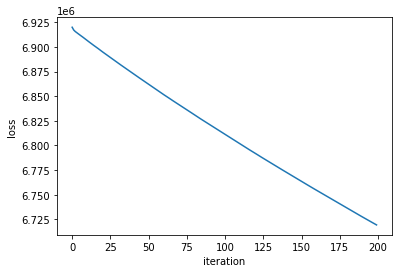

In [21]:
pl.plot(np.array(built_autoencoder.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')


Figure 1: Learning rate plotted from the original autoencoder. There is no sign that after 200 iterations that the NN is done learning

No handles with labels found to put in legend.


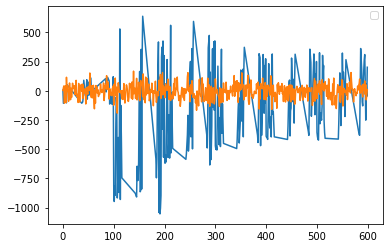

In [22]:
preds = model.predict(data_mat)

pl.figure
pl.plot(pass_matrix[0])
pl.plot(preds[0])
pl.legend()

Figure 2: representative model showing the NN's learning of a time series across 6 pass bands. The NN has not learned at this point

In [25]:
opt = keras.optimizers.Adam(learning_rate=1E-4)
model.compile(optimizer=opt, 
                    loss="mean_squared_error")

In [26]:
built_autoencoder = model.fit(data_mat, data_mat, 
                               validation_split = 0.2,
                               epochs=500, batch_size=100, verbose=1)

Epoch 1/500
63/63 [==============================] - 1s 7ms/step - loss: 6415980.0000 - val_loss: 85059152.0000
Epoch 2/500
63/63 [==============================] - 0s 5ms/step - loss: 6415977.5000 - val_loss: 85059152.0000
Epoch 3/500
63/63 [==============================] - 0s 5ms/step - loss: 6415976.0000 - val_loss: 85059144.0000
Epoch 4/500
63/63 [==============================] - 0s 5ms/step - loss: 6415975.5000 - val_loss: 85059144.0000
Epoch 5/500
63/63 [==============================] - 0s 5ms/step - loss: 6415971.0000 - val_loss: 85059136.0000
Epoch 6/500
63/63 [==============================] - 0s 5ms/step - loss: 6415968.5000 - val_loss: 85059128.0000
Epoch 7/500
63/63 [==============================] - 0s 5ms/step - loss: 6415966.5000 - val_loss: 85059120.0000
Epoch 8/500
63/63 [==============================] - 0s 5ms/step - loss: 6415966.5000 - val_loss: 85059120.0000
Epoch 9/500
63/63 [==============================] - 0s 5ms/step - loss: 6415960.5000 - val_loss: 850591

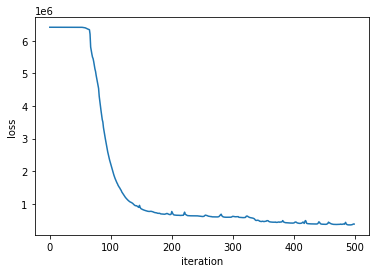

In [28]:
pl.plot(np.array(built_autoencoder.history['loss']))
pl.ylabel('loss');
pl.xlabel('iteration');



Figure 3: The model has practically converged at this point. After 500 epochs, I am considering this model to be trained. I don't know what happened where no learning occured at first. I believe this may be due to gradients tending towards 1 and 0 in the back-propofation


No handles with labels found to put in legend.


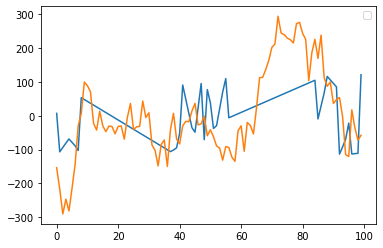

In [48]:
preds = model.predict(pass_matrix)

pl.figure
pl.plot(data_mat[0][00:100])
pl.plot(preds[0][00:100])
pl.legend()

Figure 4: After 500 epochs of training, it can be seen that the neural net performs closer to the actual data.

In [52]:
# Extract the first half of the NN(encoder)
compressed_model = Model(inputs=model.input, outputs = model.layers[1].output)
compressed_output = compressed_model.predict(data_mat)

In [53]:
compressed_output.shape

(7848, 50)

### Part 2: implementation of encoder into Machine Learning model

In [164]:
HW7_data = pd.read_csv('drive/MyDrive/MLTSA22/HW7_data.csv', header = 'infer', sep = ',')
HW7_data = HW7_data[2:]

HW7_data.rename(columns={'passband':'object_id'}, inplace=True)
HW7_data['object_id'] = HW7_data['object_id'].astype('int64')
HW7_data.head()
HW7_data = HW7_data.dropna()

In [165]:
#load metadata
metadata = pd.read_csv('drive/MyDrive/MLTSA22/training_set_metadata.csv')
metadata = metadata[2:]
#metadata.rename(columns={'passband':'object_id'}, inplace=True)
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90


In [166]:
HW7_data = HW7_data.merge(right = metadata[['object_id', 'target']], on = 'object_id')

In [167]:
HW7_data.head()

,object_id,0,0.1,0.2,1,1.1,1.2,2,2.1,2.2,...,3.1,3.2,4,4.1,4.2,5,5.1,5.2,decl,target
0,730,9.402126,0.03946334729497035,1.8288721462780042,9.086189,0.016754319742799572,1.8072285285350027,23.843549,-0.3433915764879082,5.559483176125366,...,-0.3144245029147499,8.191986945035548,46.996291,-0.3085217374227339,10.710344451041859,66.46987,-0.14976261203624203,13.332757757775846,3.583322,42
1,745,21.888378,-0.16934927118721765,4.374444817348484,195.862703,-0.18599430545308626,25.96465936927507,222.954965,-0.2906055782739891,31.957997360997965,...,-0.3732460591745778,34.967697583443154,199.127581,-0.3587730642080772,33.06905311870409,151.76267700000002,-0.3068512321908656,26.060129580165064,2.985506,90
2,1124,12.135629999999999,-0.03386359831082089,2.360084467320598,39.792286000000004,-0.4292358853956444,8.10752508189956,108.756227,-0.4387847451363745,21.31985388932545,...,-0.38341076143068203,26.27064859036663,160.143942,-0.3037711737520916,26.865912733009587,120.018125,-0.2296970029201772,21.434626839996795,3.732834,90
3,1227,75.496267,-0.1081883387805838,8.727326136152094,10.674459,-0.15193858117804732,1.6947764095228235,5.818507,0.08896861311734583,1.3385565432350304,...,-0.02955359577574776,1.6214888802939387,21.829071,0.11486058967085745,3.5990472228908947,30.463475000000003,-0.2111895468560591,5.593902737614741,-27.279613,65
4,1598,283.208631,-0.2775802829367614,52.335031120857174,1452.220082,-0.18631179792910574,246.9680022732182,1293.105529,-0.18868684340739272,217.1301562592056,...,-0.1913454691264657,175.15722360030526,742.636162,-0.1863220716887437,130.3793336535326,666.898464,-0.20260576515898288,114.30103895596676,3.583322,90


In [209]:
col_names = [f'F_{i}' for i in range(0,50)]
comp_df = pd.DataFrame(compressed_output, columns = col_names)
X = HW7_data.merge(comp_df, left_index = True, right_index = True)
y = HW7_data['target']
y_full = y

In [201]:
features_rf = RandomForestClassifier(max_depth = 8, random_state = 1)
comp_scores = cross_val_score(features_rf, X, y, cv = 10, scoring = 'f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [202]:
y_pred_full = cross_val_predict(features_rf, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [190]:
comp_scores.mean()

0.5466666666666666

#Just the original data minus the autoencoder

In [210]:

X = HW7_data.drop('target',1)
y = HW7_data['target']
y_partial = y
features_rf = RandomForestClassifier(max_depth = 8, random_state = 0)
comp_scores = cross_val_score(features_rf, X, y, cv = 10, scoring = 'f1_weighted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [204]:
comp_scores.mean()

0.30616666666666664

In [206]:
y_pred_partial = cross_val_predict(features_rf, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [215]:
conf_mat_full = confusion_matrix(y_full, y_pred_full)
print(conf_mat_full)
print()
conf_mat_partial = confusion_matrix(y_partial, y_pred_partial)
print(conf_mat_partial)

[[ 0  0  1  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  1  0]
 [ 0  0  1  1  1  0  0  1  0]
 [ 0  0  1  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  1  0]]

[[ 0  0  1  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  7  0]
 [ 0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  1  1  0  2  0]
 [ 0  0  1  0  0  0  0  1  0]
 [ 0  1  1  0  0  0  0  2  0]
 [ 0  0  3  0  1  0  0 10  0]
 [ 0  0  0  0  0  0  0  1  0]]


## Discussion


The mean f1 weighted scores for a 10-fold cross validation when including the autoencoder is 0.546. This is a moderate score, given that this is not binary classification. It is shown that this is much better than just classification including the extracted features. Just extracted features has a mean f1 score of 0.30, indicating approximately random performance. It can be seen from the confusion matrix that adding the neural network to the features improves performance